In [1]:
from table_corrigé import *
from corde import *
from excitation import exc_ref
import fonctions_ss as ss
from variation_param import param_variation
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Audio
%matplotlib widget
plt.rcParams["figure.figsize"] = (12,4)
from tqdm import tqdm
from scipy.io import wavfile
import pickle as pkl

In [2]:
#Choix de la configuration de la guitare
table = medium_1
corde = corde_acier_1
Fe = 2**14

#Emplacement des fichiers d'enregistrement
path = "../../../Dataset/Test_vico2/Medium_1_corr_vico/Corde_acier_1/"

#Génération de variations autour de ces configurations de référence
N_sample = 500
_, table_dicos, corde_dicos, exc_dicos, noise_prop = param_variation(N_sample,table,corde, exc_ref)

norme = 50000 #a l'arrache

dico = {}
for i in tqdm(range(N_sample)) :
    table_dico = table_dicos[i]
    corde_dico = corde_dicos[i]
    exc_dico = exc_dicos[i]
    acc_Nt = ss.Main_ss(table_dico,corde_dico, exc_ref=exc_dico, Fe=Fe, obs="force", plot_fext=False, plot_deformee=False, debug=False)
    # acc_Nt /= np.max(np.abs(acc_Nt))
    acc_Nt /= norme
    if np.max(np.abs(acc_Nt)) > 1 :
        print(f"Attention, le signal {'acc_Nt_' + str(i) + '.wav'} clip")
    
    wavfile.write(path + "acc_Nt_" + str(i) + ".wav", Fe, acc_Nt)

    #Ajout d'un bruit blanc tel que la variance du rapport signal bruit soit de 8.39dB. On veut également que le rapport signal bruit soit de 17.75db
    # acc_Nt += noise_prop[i]*np.random.normal(0, 10**(-8.39/20), acc_Nt.shape)
    # acc_Nt += 10**(-np.random.normal(17.75, 8.39)/20)*np.random.normal(0, 1, acc_Nt.shape)
    # display(Audio(acc_Nt, rate=Fe))

    kle = str(i) + ".wav"
    dico[kle] = {}
    dico[kle]['acc_Nt'] = acc_Nt
    dico[kle]['T'] = corde_dico['T']
    dico[kle]['rho_l'] = corde_dico['rho_l']
    dico[kle]['Lc'] = corde_dico['Lc']
    dico[kle]['B'] = corde_dico['B']
    dico[kle]['rho_T'] = table_dico['rho_T']
    dico[kle]['L_x'] = table_dico['L_x']
    dico[kle]['L_y'] = table_dico['L_y']
    dico[kle]['h'] = table_dico['h']
    dico[kle]['E_nu'] = table_dico['E_nu']
    dico[kle]['xexc_ratio'] = exc_dico['xexc_ratio']
    dico[kle]['temps_desc'] = exc_dico['temps_desc']
    dico[kle]['Fe'] = Fe

#Saving the big dictionnary
with open(path + "details.pkl", "wb") as f:
    pkl.dump(dico, f)


100%|██████████| 500/500 [26:08<00:00,  3.14s/it]


In [4]:
#Choix de la configuration de la guitare
table = plexi
corde = corde_acier_1
Fe = 2**14

#Emplacement des fichiers d'enregistrement
path = "../../../Dataset/Test_vico2/Plexi/Corde_acier_1/"

#Génération de variations autour de ces configurations de référence
N_sample = 500
_, table_dicos, corde_dicos, exc_dicos, noise_prop = param_variation(N_sample,table,corde, exc_ref)

dico = {}
for i in tqdm(range(N_sample)) :
    table_dico = table_dicos[i]
    corde_dico = corde_dicos[i]
    exc_dico = exc_dicos[i]
    acc_Nt = ss.Main_ss(table_dico,corde_dico, exc_ref=exc_dico, Fe=Fe, obs="force", plot_fext=False, plot_deformee=False, debug=False)
    acc_Nt /= norme
    if np.max(np.abs(acc_Nt)) > 1 :
        print(f"Attention, le signal {'acc_Nt_' + str(i) + '.wav'} clip")

    wavfile.write(path + "acc_Nt_" + str(i) + ".wav", Fe, acc_Nt)
    #Ajout d'un bruit blanc tel que la variance du rapport signal bruit soit de 8.39dB. On veut également que le rapport signal bruit soit de 17.75db
    # acc_Nt += noise_prop[i]*np.random.normal(0, 10**(-8.39/20), acc_Nt.shape)
    # acc_Nt += 10**(-np.random.normal(17.75, 8.39)/20)*np.random.normal(0, 1, acc_Nt.shape)
    # display(Audio(acc_Nt, rate=Fe))

    kle = str(i) + ".wav"
    dico[kle] = {}
    dico[kle]['acc_Nt'] = acc_Nt
    dico[kle]['T'] = corde_dico['T']
    dico[kle]['rho_l'] = corde_dico['rho_l']
    dico[kle]['Lc'] = corde_dico['Lc']
    dico[kle]['B'] = corde_dico['B']
    dico[kle]['rho_T'] = table_dico['rho_T']
    dico[kle]['L_x'] = table_dico['L_x']
    dico[kle]['L_y'] = table_dico['L_y']
    dico[kle]['h'] = table_dico['h']
    dico[kle]['E_nu'] = table_dico['E_nu']
    dico[kle]['xexc_ratio'] = exc_dico['xexc_ratio']
    dico[kle]['temps_desc'] = exc_dico['temps_desc']
    dico[kle]['Fe'] = Fe

#Saving the big dictionnary
with open(path + "details.pkl", "wb") as f:
    pkl.dump(dico, f)

100%|██████████| 500/500 [25:29<00:00,  3.06s/it]


In [ ]:
#Generate a pink noise
from scipy.signal import lfilter, butter
from numpy.random import randn
def pink_noise(n_samples, f_sample):
    b, a = butter(5, [0.5, 1000], btype='bandpass', fs=f_sample, output='ba')
    pink_noise = lfilter(b, a, randn(n_samples))
    return pink_noise

#Add the pink noise to the signal
acc_Nt += 10**(-np.random.normal(17.75, 8.39)/20)*pink_noise(acc_Nt.shape[0], Fe)
display(Audio(acc_Nt, rate=Fe))

# Loading some files created...

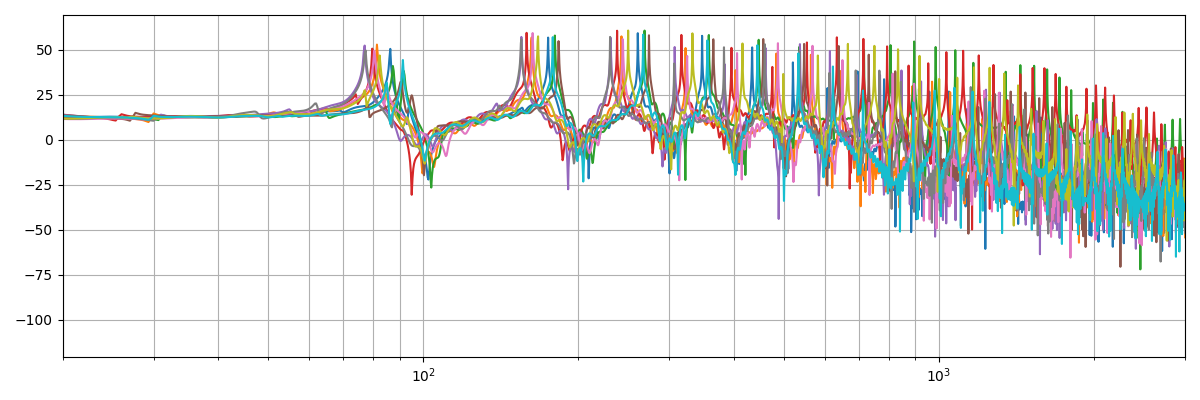

In [12]:
#Loading some data
with open("../../../Dataset/Test_vico2/Plexi/Corde_acier_1/details.pkl", "rb") as f:
    dico_plexi = pkl.load(f)

with open("../../../Dataset/Test_vico2/Medium_1/Corde_acier_1/details.pkl", "rb") as f:
    dico_m1 = pkl.load(f)

with open("../../../Dataset/Test_vico2/Medium_2/Corde_acier_1/details.pkl", "rb") as f:
    dico_m2 = pkl.load(f)

with open("../../../Dataset/Test_vico2/Metal/Corde_acier_1/details.pkl", "rb") as f:
    dico_metal = pkl.load(f)


fig = plt.figure()
ax1 = fig.add_subplot(111)
for i in list(dico_plexi.keys())[:10] :
    Nfft = len(dico_plexi[i]['acc_Nt'])
    Y = np.fft.rfft(dico_plexi[i]['acc_Nt'], Nfft)
    fy = np.fft.rfftfreq(Nfft,1/Fe)

    ax1.semilogx(fy,20*np.log10(np.abs(Y)),label="")
ax1.grid(which="both")
#ax1.legend()
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title(r"")
ax1.set_xlim(20,3000)
ax1.set_ylim()

fig.tight_layout()

plt.show()

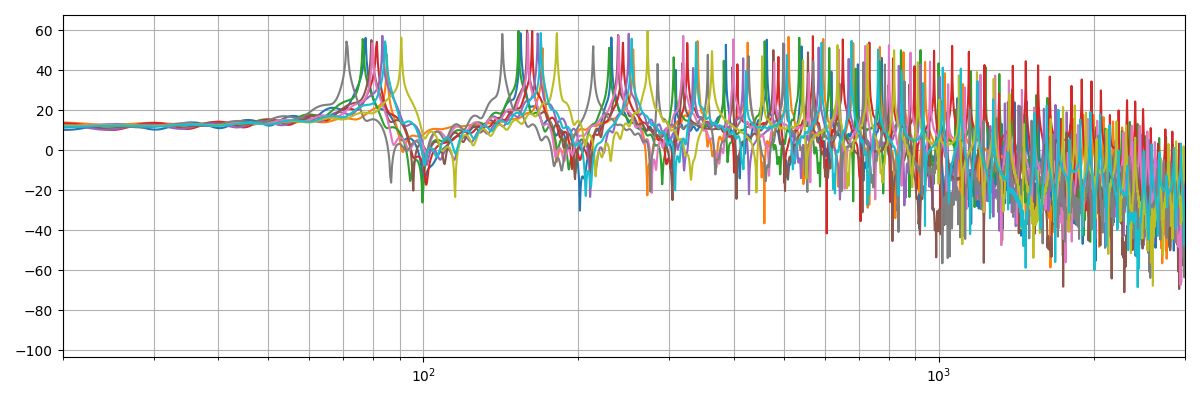

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
for i in list(dico_metal.keys())[:10] :
    Nfft = len(dico_metal[i]['acc_Nt'])
    Y = np.fft.rfft(dico_metal[i]['acc_Nt'], Nfft)
    fy = np.fft.rfftfreq(Nfft,1/Fe)

    ax1.semilogx(fy,20*np.log10(np.abs(Y)),label="")
ax1.grid(which="both")
#ax1.legend()
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title(r"")
ax1.set_xlim(20,3000)
ax1.set_ylim()

fig.tight_layout()

plt.show()

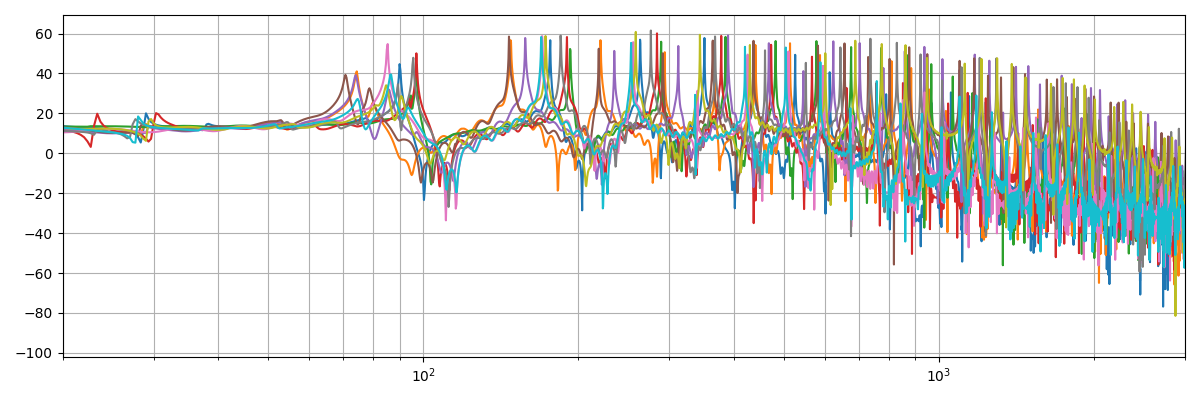

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
for i in list(dico_m1.keys())[:10] :
    Nfft = len(dico_m1[i]['acc_Nt'])
    Y = np.fft.rfft(dico_m1[i]['acc_Nt'], Nfft)
    fy = np.fft.rfftfreq(Nfft,1/Fe)

    ax1.semilogx(fy,20*np.log10(np.abs(Y)),label="")
ax1.grid(which="both")
#ax1.legend()
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title(r"")
ax1.set_xlim(20,3000)
ax1.set_ylim()

fig.tight_layout()

plt.show()